In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
filename = ('/content/drive/MyDrive/CodingDojo/DataSet/dataset_ExportApparelUS_DV.xlsx')
df = pd.read_excel(filename)
df.head()

,Country,Year,Month,Exports (USD Millions)
0,India,2019,March,405
1,India,2019,April,408
2,India,2019,May,387
3,India,2019,June,311
4,India,2020,March,381


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Country                 48 non-null     object
 1   Year                    48 non-null     int64 
 2   Month                   48 non-null     object
 3   Exports (USD Millions)  48 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 1.6+ KB


In [ ]:
export_2019 = df.loc[df['Year'] == 2019, :]
export_2020 = df[df['Year'] == 2020]
export_2020

In [10]:
total_export_2019 = export_2019.groupby(['Country'], as_index=False)['Exports (USD Millions)'].sum().sort_values(['Exports (USD Millions)'], ascending=False)
total_export_2020
total_export_2019

,Country,Exports (USD Millions)
5,Vietnam,4064
0,Bangladesh,2043
3,India,1511
2,Honduras,945
1,El Salvador,625
4,Nicaragua,571


In [42]:
total_export_2020 = export_2020.groupby(['Country'], as_index=False)[['Exports (USD Millions)']].sum()#.sort_values(['Exports (USD Millions)'], ascending=False)
total_export_2020

,Country,Exports (USD Millions)
0,Bangladesh,1318
1,El Salvador,189
2,Honduras,306
3,India,777
4,Nicaragua,350
5,Vietnam,3272


In [ ]:
#to substarct values from one df to another and print specified columns
#df3 = df1[['Lat1', 'Lon1']]
#df3['tp1-tp2'] = df1.tp1 - df2.tp2
export_difference = total_export_2020[['Country']]
export_difference['Exports (USD Millions)'] = total_export_2020['Exports (USD Millions)'].subtract(total_export_2019['Exports (USD Millions)'])
export_difference = export_difference.sort_values(['Exports (USD Millions)'], ascending=True)
export_difference

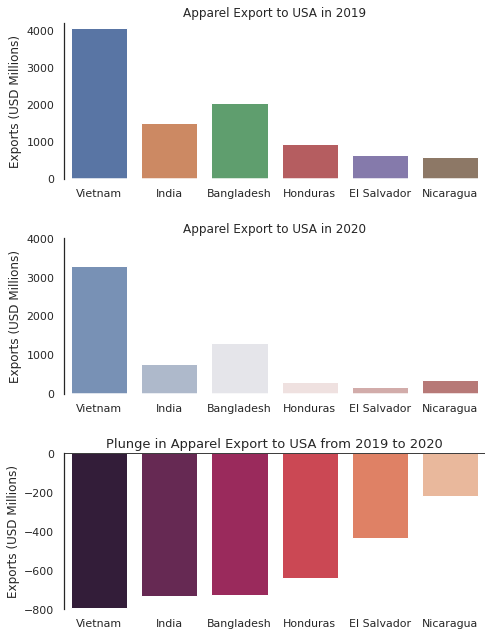

In [92]:
sns.set_theme(style='white', context='notebook')
#sns.set_style("dark")
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(7,9), sharex=False)

sns.barplot(x=export_difference['Country'], y=total_export_2019['Exports (USD Millions)'], palette='deep', ax=ax1)
ax1.set_ylim(bottom =0, top =4200)
ax1.axhline(1, color='white', clip_on=False)
ax1.set_title("Apparel Export to USA in 2019");

sns.barplot(x=export_difference['Country'], y=total_export_2020['Exports (USD Millions)'], palette='vlag', ax=ax2)
ax2.set_ylim(bottom =0, top =4000)
ax2.axhline(1, color='white', clip_on=False)
ax2.set_title("Apparel Export to USA in 2020");

sns.barplot(x=export_difference['Country'], y=export_difference['Exports (USD Millions)'], palette='rocket', ax=ax3)
ax3.set_ylim(bottom =-800, top =0)
ax3.axhline(4, color='black', clip_on=True)
ax3.set_title("Plunge in Apparel Export to USA from 2019 to 2020", fontsize=13);

sns.despine(bottom=True)
plt.setp(fig.axes, xlabel=(''))
plt.tight_layout(h_pad=2)
plt.savefig('apparelexport.png', dpi = 300)